In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def getInfo(indata):
    """Print Dataframe information"""
    print(indata.head())
    print(indata.shape)
    print(indata.tail(3))

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 

In [18]:
#data = pd.read_csv("C:\\data\\DataScience\\DataSets\\Autism-Screening\\Toddler Autism dataset.csv")
data = pd.read_csv("C:\\data\\DataScience\\Projects\\capstone\\proj1\\Toddler Autism dataset.csv")
#print(data.info())  #call function to print info if needed
data['JaundiceCode']= data.Jaundice.eq('yes').mul(1)
data['ASDCode']= data.ASD.eq('Yes').mul(1)
data['SexCode']= data.Sex.eq('m').mul(1)
data['FamilyASDCode']= data.Family_mem_with_ASD.eq('yes').mul(1)
getInfo(data)
#print(data.columns)

   Case_No  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0        1         0         0         0         0         0         0   
1        2         1         1         0         0         0         1   
2        3         1         0         0         0         0         0   
3        4         1         1         1         1         1         1   
4        5         1         1         0         1         1         1   

   A7_Score  A8_Score  A9_Score      ...        Sex       Ethnicity  Jaundice  \
0         1         1         0      ...          f  middle eastern       yes   
1         1         0         0      ...          m  White European       yes   
2         1         1         0      ...          m  middle eastern       yes   
3         1         1         1      ...          m        Hispanic        no   
4         1         1         1      ...          f  White European        no   

  Family_mem_with_ASD Who completed the test  ASD JaundiceCode ASDCo

 seaborn.countplot(x=None, y=None, hue=None, data=None, 
                   order=None, hue_order=None, orient=None, 
                   color=None, palette=None, saturation=0.75, 
                   dodge=True, ax=None, **kwargs)
 
Index(['Case_No', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD', 'JaundiceCode', 'ASDCode'],
      dtype='object')
   

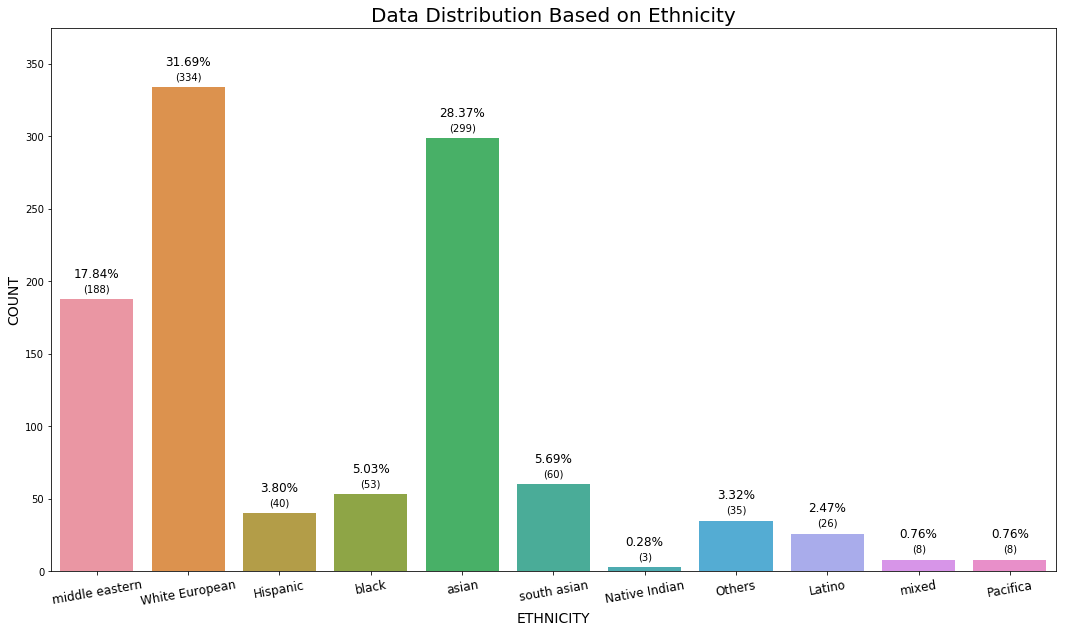

In [6]:
plt.figure(figsize = (18,10))
ax=sns.countplot(x = 'Ethnicity' , data = data,  orient="H")
total = float(len(data))
#print(total)
ax.set_title("Data Distribution Based on Ethnicity", fontsize=20)
plt.ylabel("COUNT", fontsize=14)
plt.xlabel("ETHNICITY", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="center", fontsize=12)
#plt.tight_layout()  #for making it more compact
plt.ylim(0, 375)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
    ax.text(p.get_x()+p.get_width()/2.,
    height + 5,
    '({:1.0f})'.format(height),
    ha="center", fontsize=10) 
plt.show()

Above figure shows the data distribution based on the Ethnicity of the todler. Majority of the sample is from Middle Eastern, White European and Asian ethnicity 



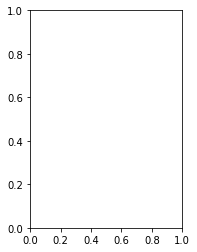

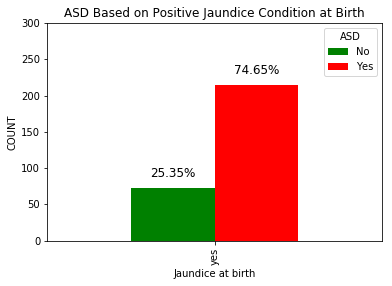

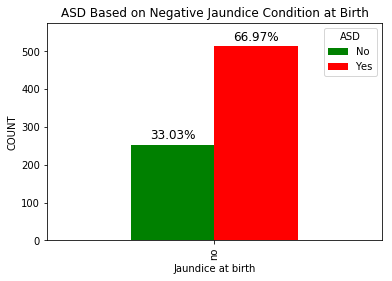

In [7]:
#plt.subplot(1, 2)
asd_yes=data.loc[data['Jaundice'] == 'yes']
asd_no=data.loc[data['Jaundice'] == 'no']
#print(asd_yes)
#print(asd_yes.info())
plt.subplot(1, 2, 1)
ax=pd.crosstab(asd_yes.Jaundice, asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Positive Jaundice Condition at Birth", fontsize=12)
total = float(len(asd_yes))
plt.ylim(0, 300)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
#plt.subplot(1, 2, 2)
ax=pd.crosstab(asd_no.Jaundice, asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Jaundice at birth", fontsize=10)
ax.set_title("ASD Based on Negative Jaundice Condition at Birth", fontsize=12)
total = float(len(asd_no))
plt.ylim(0, 575)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
plt.show()


Above plots shows the Jaundice condition influence on ASD and it does seems to contribute to ASD condition


170.0
884.0


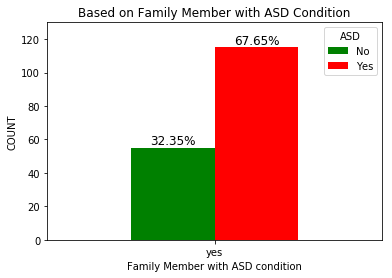

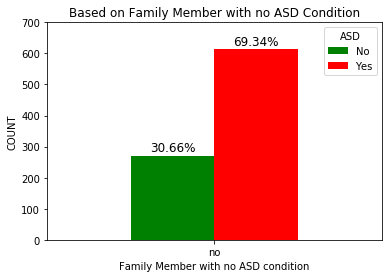

In [155]:
fm_asd_yes=data.loc[data['Family_mem_with_ASD'] == 'yes']
fm_asd_no=data.loc[data['Family_mem_with_ASD'] == 'no']
#print(asd_yes)
#print(asd_yes.info())
#plt.subplot(1, 2, 1)
ax=pd.crosstab(fm_asd_yes.Family_mem_with_ASD, fm_asd_yes.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with ASD condition", fontsize=10)
ax.set_title("Based on Family Member with ASD Condition", fontsize=12)
total = float(len(fm_asd_yes))
print(total)
plt.ylim(0, 130)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height +2,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
#plt.subplot(1, 2, 2)

ax=pd.crosstab(fm_asd_no.Family_mem_with_ASD, fm_asd_no.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Family Member with no ASD condition", fontsize=10)
ax.set_title("Based on Family Member with no ASD Condition", fontsize=12)
total = float(len(fm_asd_no))
print(total)
plt.ylim(0, 700)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=12)   
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD condition based on if the ASD condition existed in any of the family member. The above plot doesn't show much if Family member with ASD condition contributes to ASD condition in todler.


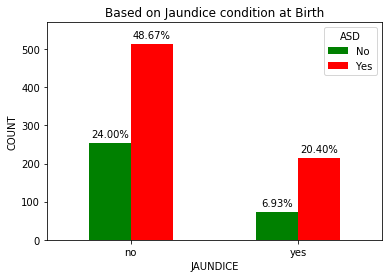

In [161]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
ax.set_title("Based on Jaundice condition at Birth", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above plot shows the distribution of ASD cases based on Jaundice condition at birth.


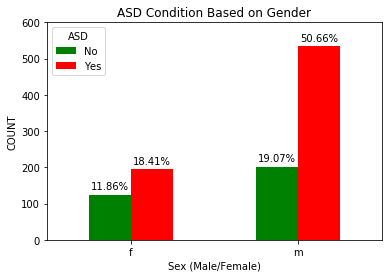

In [251]:
ax=pd.crosstab(data.Sex, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("Sex (Male/Female)", fontsize=10)
ax.set_title("ASD Condition Based on Gender", fontsize=12)
total = float(len(data))
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

Above is the plot showing distribution of ASD cases based on Gender. Its quite evident that the condition is more prominent in males.


Deactivated this section as still in WIP

#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
#ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
ax=pd.crosstab(data.Jaundice, data.ASD).plot(kind='bar', stacked=False, color=['green','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("JAUNDICE", fontsize=10)
total = float(len(data))
#yj_total = float(len(data.loc[data['Jaundice'] == 'yes']))
#nj_total = float(len(data.loc[data['Jaundice'] == 'no']))
#print(total)
#print(yj_total)
#print(nj_total)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

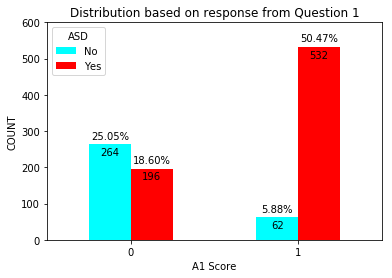

In [184]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.A1_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A1 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 1", fontsize=12)
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

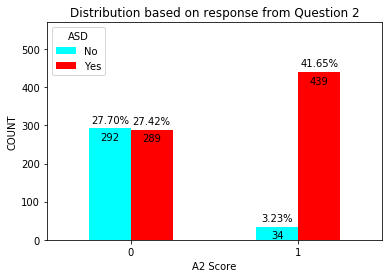

In [185]:
#pd.crosstab(data.ASD, data.Jaundice).plot(kind='bar')
ax=pd.crosstab(data.A2_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
#ct=pd.crosstab(data.Jaundice, data.ASD)
#print(ct)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A2 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 2", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

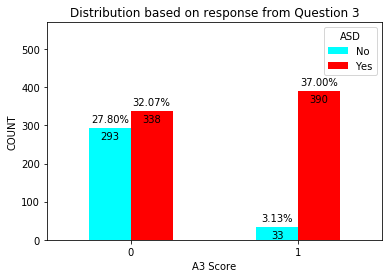

In [186]:

ax=pd.crosstab(data.A3_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A3 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 3", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

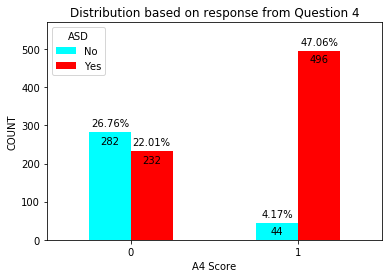

In [187]:
ax=pd.crosstab(data.A4_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A4 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 4", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

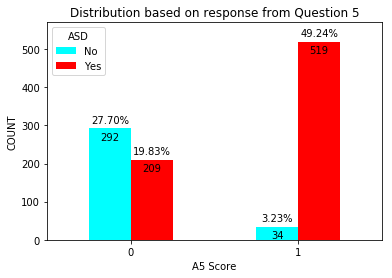

In [188]:
ax=pd.crosstab(data.A5_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A5 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 5", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

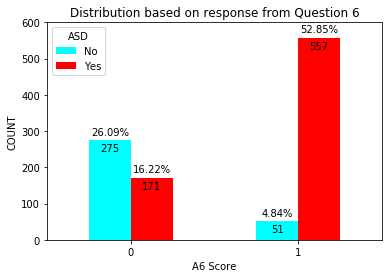

In [191]:
ax=pd.crosstab(data.A6_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A6 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 6", fontsize=12)
plt.ylim(0, 600)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

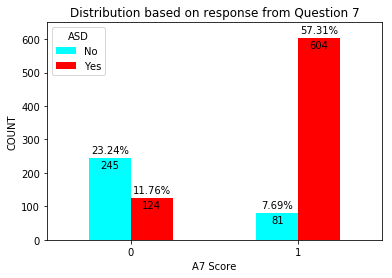

In [195]:
ax=pd.crosstab(data.A7_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A7 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 7", fontsize=12)
plt.ylim(0, 650)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

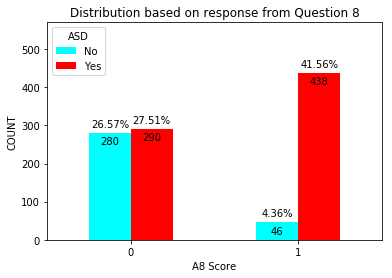

In [196]:
ax=pd.crosstab(data.A8_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A8 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 8", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

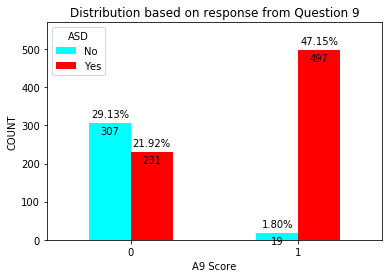

In [197]:
ax=pd.crosstab(data.A9_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A9 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 9", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

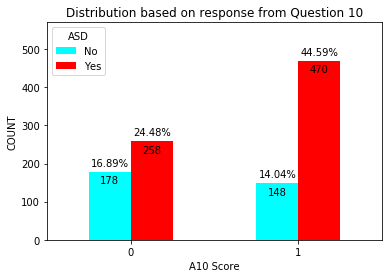

In [198]:
ax=pd.crosstab(data.A10_Score, data.ASD).plot(kind='bar', stacked=False, color=['aqua','red'], grid=False)
plt.ylabel("COUNT", fontsize=10)
plt.xlabel("A10 Score", fontsize=10)
ax.set_title("Distribution based on response from Question 10", fontsize=12)
plt.ylim(0, 570)
for p in ax.patches:
    height = p.get_height()
    #print(height)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 15,
    '{:1.2f}%'.format(height/total*100) ,
    ha="center", fontsize=10)
    ax.text(p.get_x()+p.get_width()/2.,
    height -30 ,
    '{:1.0f}'.format(height),
    ha="center", fontsize=10) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=10)
plt.show()

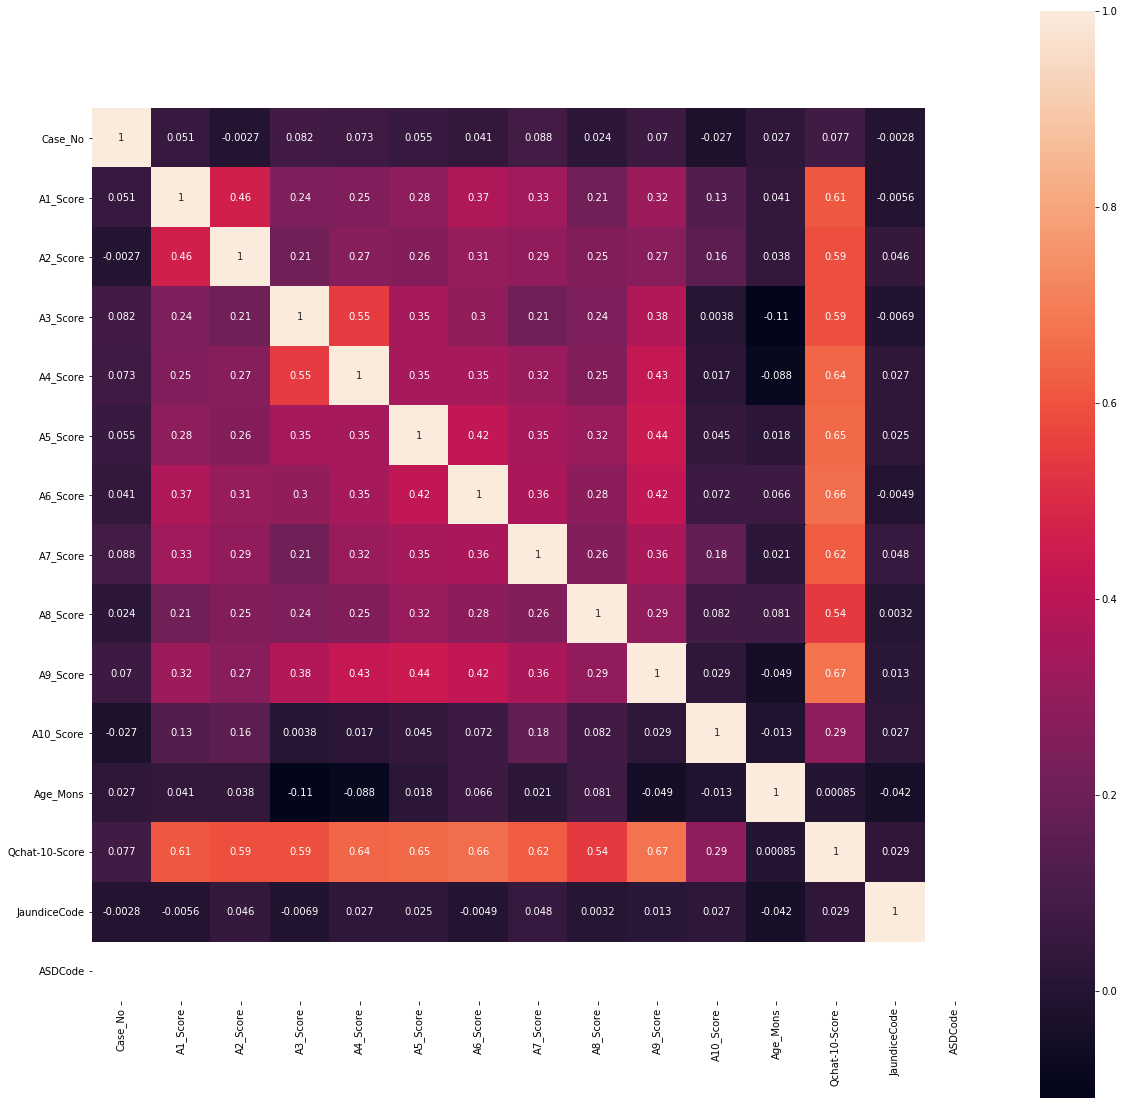

In [116]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.show()

In [19]:
X=data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age_Mons', 'Qchat-10-Score', 'SexCode',
       'JaundiceCode', 'FamilyASDCode']]
y=data['ASDCode']

print(X)
print(y)

      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0            0         0         0         0         0         0         1   
1            1         1         0         0         0         1         1   
2            1         0         0         0         0         0         1   
3            1         1         1         1         1         1         1   
4            1         1         0         1         1         1         1   
5            1         1         0         0         1         1         1   
6            1         0         0         1         1         1         0   
7            0         1         0         0         1         0         1   
8            0         0         0         0         0         0         1   
9            1         1         1         0         1         1         0   
10           1         0         0         1         0         1         1   
11           1         1         1         1         0         1

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
print(y_test)

325     1
721     1
114     1
320     0
712     1
434     1
476     1
1025    0
99      0
304     1
713     1
585     1
135     0
210     0
761     1
218     1
157     1
452     1
318     1
327     1
514     1
963     0
274     1
194     0
28      1
460     0
607     1
0       0
517     1
1041    0
       ..
1015    1
307     1
459     1
520     1
965     1
205     1
334     1
838     0
900     1
563     0
184     1
529     1
118     0
689     1
941     0
134     1
336     0
155     1
992     1
926     1
706     1
77      0
413     0
308     1
781     1
601     0
154     1
882     1
779     1
931     0
Name: ASDCode, Length: 317, dtype: int32


In [24]:
pred=lgr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=pred))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       103
          1       0.98      1.00      0.99       214

avg / total       0.98      0.98      0.98       317



In [26]:
from sklearn.metrics import confusion_matrix


confusion_df = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)






         Predicted Class 0  Predicted Class 1
Class 0                 98                  5
Class 1                  1                213
